# Classifying Wines based on features using Logistic Regression

In this data, wine is classed into three varieties represented by 0, 1 and 2. The variety of a wine can be determined or predicted by the some of its qualities, such as the Alcohol, Magensium and Phenol levels, the hue and the color intensity etc.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score
%matplotlib inline

In [2]:
wine = pd.read_csv('Wine.csv')
wine.sample(5)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
32,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990,0
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672,1
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,1
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345,1
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,2


### Data Cleaning

In [3]:
# Checking for null values
wine.isna().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

No null values

In [4]:
# Checking for duplicated values
wine.duplicated().sum()

0

No duplicates

## EDA

In [5]:
wine.shape

(178, 14)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

## Feature Distribution
Using Bivariate Analysis to identify the dependency of wine variety on each features. This enables us to select the most import features for modelling

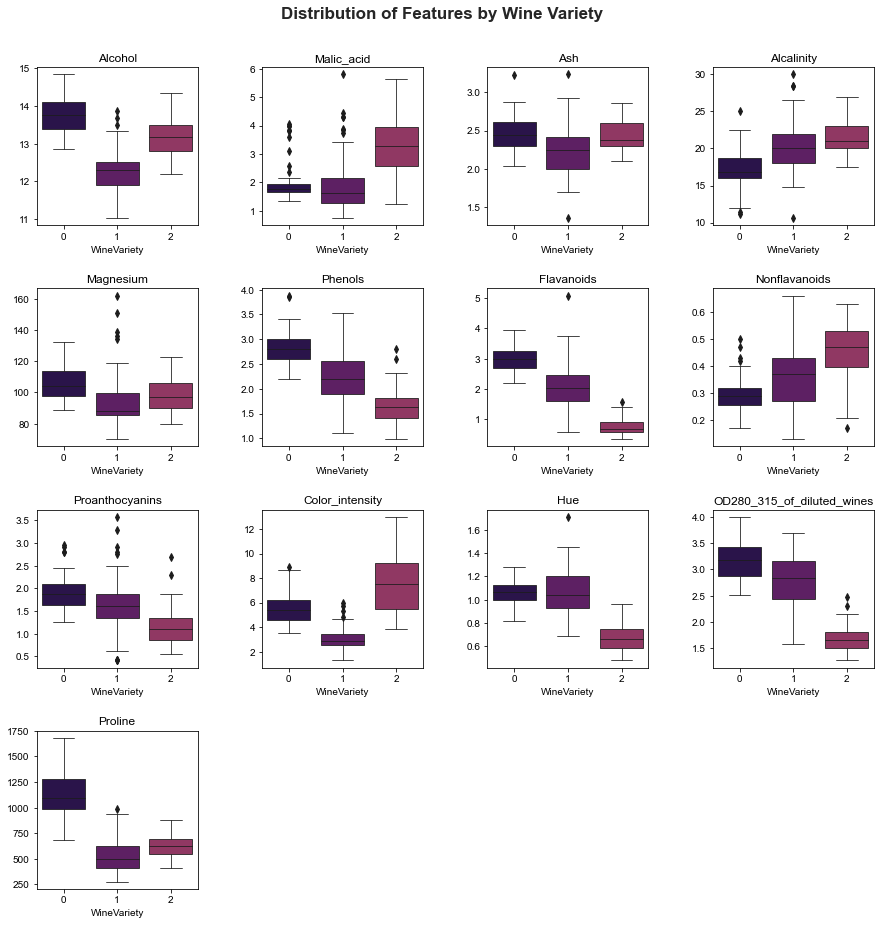

In [7]:
# Visualizing the feature distribution by the label, Wine variety
features = wine.drop('WineVariety', axis= 1).columns

fig, axes = plt.subplots(4, 4, figsize= (15, 14))
sns.set_palette('inferno')
sns.set_style('white')

y= 0
for column in features:
    i, j = divmod(y, 4)
    sns.boxplot(ax= axes[i, j], x= 'WineVariety', y= column, data= wine, linewidth= .8)\
    .set(title= column, ylabel= None)
    y= y+1

for ax in axes.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)

plt.suptitle('Distribution of Features by Wine Variety',fontweight= 'bold', y= 1, size = 17)
plt.subplots_adjust(hspace= 0.4, wspace= 0.4, top= 0.94)
plt.show()

#### **Conclusion**
All features have values distribted variably across the three wine varieties and therefore will have a good predictor power, Hence they'll all be fitted in the model.

## **Modelling**

**Features:**  Alcohol, Malic_acid, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color_intensity, Hue, OD280_315_of_diluted_wines, Proline

**Label:** WineVariety

In [8]:
# Subsetting the data into the features and label
x = wine.drop('WineVariety', axis= 1)
y=  wine['WineVariety']

In [9]:
x.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: WineVariety, dtype: int64

## **Data Preprocessing**

Some features have values that are strikingly higher than other features, and because this could affect the performance of the model, they'll need to be scaled. This prevents features with large values from producing coefficients that disproportionately affect the predictions.

In [11]:
#Splitting the data into train and test sizes
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 1)

print('Training Cases:', len(X_train))
print('Test Cases:', len(X_test))

Training Cases: 124
Test Cases: 54


In [12]:
# Creating a pipeline to carry out scaling on some features
feature = ['Alcohol', 'Alcalinity', 'Magnesium', 'Proline', 'Color_intensity'] # columns to be scaled 
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])

In [13]:
# Fitting the train size on the model
model = pipeline.fit(X_train, y_train)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0], dtype=int64)

In [15]:
model.score(X_train, y_train)

0.9274193548387096

In [16]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  1, 11]], dtype=int64)

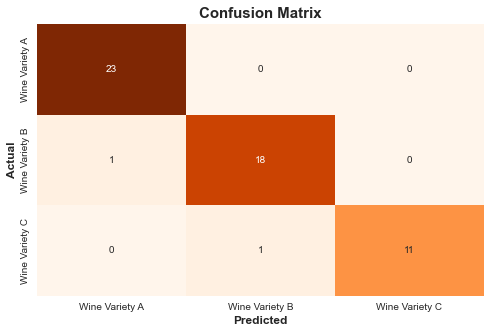

In [17]:
# Visualizing the Confusion matrix
classes = ['Wine Variety A','Wine Variety B','Wine Variety C']

plt.figure(figsize= (8,5))
sns.heatmap(cm, annot= True, cbar= False, cmap= 'Oranges', xticklabels= classes, yticklabels= classes)
plt.title('Confusion Matrix', fontweight= 'bold', size=15)
plt.xlabel("Predicted",  fontweight= 'bold', size=12)
plt.ylabel("Actual",  fontweight= 'bold', size=12)
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.95      0.95      0.95        19
           2       1.00      0.92      0.96        12

    accuracy                           0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.96      0.96      0.96        54



In [19]:
# Saving the model for later use
import joblib
path= './model.pkl'
joblib.dump(model, path)

model= joblib.load(path)

In [20]:
# Creating a new data to test model on
X_new = pd.DataFrame([[13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285], 
                     [12.37, 0.94, 1.36, 10.6, 88, 1.98, 0.57, 0.28, 0.42, 1.95, 1.05, 1.832, 520]], 
                     columns = wine.drop('WineVariety', axis= 1).columns)
X_new

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline
0,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.870,1285
1,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.832,520


In [21]:
# Results
model.predict(X_new)

array([0, 1], dtype=int64)